1. What is the primary goal of Linear Discriminant Analysis (LDA)?

* A. To maximize the variance of data
* B. To minimize the correlation between features
* C. To reduce dimensionality while preserving class separability
* D. To cluster the data based on similarity

# LDA reduces dimensionality while ensuring that the different classes remain as seperble as posssible

2.Which of the following is true about LDA compared to PCA?

* A. LDA is unsupervised, while PCA is supervised
* B. LDA uses class labels, PCA does not
* C. LDA maximizes total data variance, PCA maximizes class separability
* D. Both LDA and PCA use label information

# LDA is supervised and uses class labels to find directions that best seperate classes ; PCA is unsupervised
1. C
2. B


3.In LDA, what does the term "n-1" refer to in the context of scatter matrix calculation?

* A. Number of features minus 1
* B. Number of classes minus 1
* C. Number of samples minus 1, for unbiased variance
* D. Number of eigenvectors used

3.C
# n-1 used in denominator when calculating sample covariance to get an unbiased estimate (bessel's correction)

4. What does LDA try to maximize?

* A. Within-class variance
* B. Between-class variance
* C. Total variance
* D. Covariance of the features

# LDA tries to maximize between class scatter and minimize within - class scatter to improve class seperability

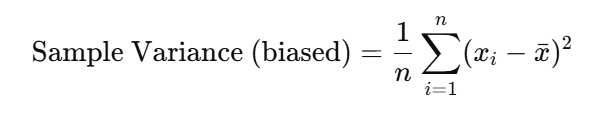

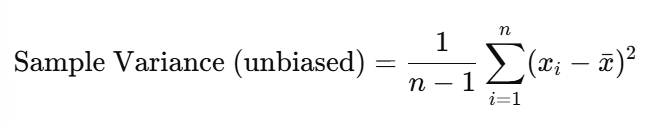

when you calculate the sample mean (x-) , you are already using some of the information from the sample . that causes the sample variance to be baised - it tends to be too small

by dividing by n-1 , you correct this bias and get a better estimate of the true population variance

In LDA, when computing scatter or covariance matrices

# LDA tries to find a linear combination of features that best seperated two or more classes of data . It does this by

1. Maximizing the seperation between classes
2. Minimizing the spread within each class


# How does LDA works ?

1. compute the mean vectors for each class.
2. compute the scatter matrices
* within - class scatter matrix : Measure the spread of data within each class
* between class scatter matrix : Measure the spread between class means
3. Compute the eigen values and eigen vectors
4. select the top eigen vectors
5. project the data onto the new lower dimensional space

# **Importing Libraries**

**Classical Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**SKLearn Libraries**

In [ ]:
from sklearn.metrics import *
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# **Data Loading**

**we can grab the data directly from the load_digits(), as the data we are having is in the form of dictionary**

In [ ]:
digits = load_digits()

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

**Let's create a dataframe**

In [ ]:
df = pd.DataFrame(digits.data , columns = digits.feature_names)

In [ ]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
print(df.to_string())

      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  pixel_1_2  pixel_1_3  pixel_1_4  pixel_1_5  pixel_1_6  pixel_1_7  pixel_2_0  pixel_2_1  pixel_2_2  pixel_2_3  pixel_2_4  pixel_2_5  pixel_2_6  pixel_2_7  pixel_3_0  pixel_3_1  pixel_3_2  pixel_3_3  pixel_3_4  pixel_3_5  pixel_3_6  pixel_3_7  pixel_4_0  pixel_4_1  pixel_4_2  pixel_4_3  pixel_4_4  pixel_4_5  pixel_4_6  pixel_4_7  pixel_5_0  pixel_5_1  pixel_5_2  pixel_5_3  pixel_5_4  pixel_5_5  pixel_5_6  pixel_5_7  pixel_6_0  pixel_6_1  pixel_6_2  pixel_6_3  pixel_6_4  pixel_6_5  pixel_6_6  pixel_6_7  pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  pixel_7_7
0           0.0        0.0        5.0       13.0        9.0        1.0        0.0        0.0        0.0        0.0       13.0       15.0       10.0       15.0        5.0        0.0        0.0        3.0       15.0        2.0        0.0       11.0        8.0        0.0        0.0        4.0 

In [ ]:
df['Target'] = digits.target

In [ ]:
df['Target'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


<Figure size 640x480 with 0 Axes>

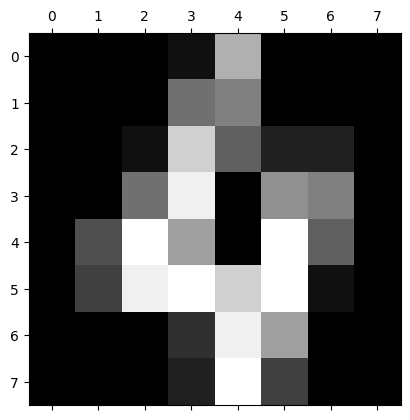

In [ ]:
plt.gray()
plt.matshow(digits.data[4].reshape(8,8))
plt.show()

**Let's split the data into features**



In [ ]:
# Indpendent features

X = digits.data

# Dependent features

Y = digits.target

In [ ]:
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [ ]:
print(X.shape)

(1797, 64)


In [ ]:
print(Y)

[0 1 2 ... 8 9 8]


In [ ]:
print(Y.shape)

(1797,)


In [ ]:
# Independent columns

x_df = df.drop('Target', axis =1)

In [ ]:
# Dependent column

y_df = df['Target']

In [ ]:
x_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
y_df

,Target
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


**Training and Testing data**



In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25, random_state = 42)

**Standardize the data**

In [ ]:
# object to the scaled
scaler = StandardScaler()

In [ ]:
# we can pass our data

x_train = scaler.fit_transform(x_train)


In [ ]:
# now let chnage the test data

x_test = scaler.transform(x_test)

In [ ]:
x_train.shape

(1347, 64)

# **Linear Discriminant Analysis**

**In order to find the number of components required for LDA , we can use a simple formula that is n - 1**

**Just assume there are n persons, so , how many lines we would need to distinguish between the given n persons**

**If incase , you are having less number of features compared to your class, you need to use min(no of features, no_of_classes -1)**

In [ ]:
# If we are having 19 classes and there are only 8 features

min(8,19-1)

min(8,18)

8

**In this data, we are having 64 features , and number of classes 10**

* **So, In this case we would use (n-1) = 9**

In [ ]:
# object to LDA

LDA = LinearDiscriminantAnalysis(n_components = 9)

In [ ]:
x_train = LDA.fit_transform(x_train,y_train)

fit : learns the class means and compute the LDA projection directions using x_train and y_train

transform : project the original data onto these directions (typically fewer than the original dimension)

**why reassign to x_train ?**

we are replacing the high-dimesnional features with the **LDA-Reduced Features** for further steps (like classification using a model)


fit(x_train,y_train) -> learning the best directions (based on the class labels) that seperates the classes

transform(x_train) -> project the data onto those sirections to reduce dimensions

fit_transform(..) -> Shortcut for both these steops

In [ ]:
y_train

array([5, 2, 0, ..., 2, 7, 1])

In [ ]:
x_test = LDA.transform(x_test)

# LDA coefficients

In [ ]:
# New shape of x_train

x_train.shape

(1347, 9)

x_train before applying LDA - (1347, 64)

x_train after applying LDA - (1347, 9)

In [ ]:
x_test.shape

(450, 9)

# we have 10 classes -> LDA can give atmose 10-1 = 9

In [ ]:
LDA.explained_variance_ratio_

array([0.27709518, 0.18867218, 0.17606535, 0.10888121, 0.09038807,
       0.06427354, 0.04249589, 0.03091151, 0.02121708])

In [ ]:
sum(LDA.explained_variance_ratio_)

np.float64(1.0000000000000002)

# LDA.explained_variance_ratio_ - It tells you how much of the total class seperation has been captured by the LDA transformation

[0.27709518, 0.18867218, 0.17606535, 0.10888121, 0.09038807,
       0.06427354, 0.04249589, 0.03091151, 0.02121708]

* First component explain 27 % of the class seperability

* Second explain 18% and so on

* Together they explain 100%

# **Model Building**

In [ ]:
x_train.shape, x_test.shape

((1347, 9), (450, 9))

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
pred = model.predict(x_test)

# **Evaluate**

In [ ]:
print(f"Accuracy score : {accuracy_score(y_test,pred)}")

Accuracy score : 0.9577777777777777


In [ ]:
print(confusion_matrix(y_test,pred))

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 33  2  0  1  0  0  0  1  0]
 [ 0  0 36  2  0  0  0  0  0  0]
 [ 0  0  1 44  0  1  0  0  0  0]
 [ 0  0  0  0 54  0  0  1  0  0]
 [ 0  0  0  1  0 58  0  0  0  0]
 [ 0  0  0  0  1  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  1  0  0  0  1  0  0 36  0]
 [ 0  0  0  2  0  0  0  1  1 44]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      0.89      0.93        37
           2       0.92      0.95      0.94        38
           3       0.90      0.96      0.93        46
           4       0.95      0.98      0.96        55
           5       0.97      0.98      0.97        59
           6       1.00      0.98      0.99        45
           7       0.95      0.98      0.96        41
           8       0.95      0.95      0.95        38
           9       0.98      0.92      0.95        48

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



x_train = LDA.fit_transform(x_train,y_train)

x_lda - LD1 , LD2 , LD3

In [ ]:
import plotly.express as px
import pandas as pd

x_lda = x_train

df_plot = pd.DataFrame({
    'LD1' : x_lda[:, 0],
    'LD2' : x_lda[:, 1],
    'Class':y_train

})


fig = px.scatter(df_plot, x = 'LD1', y = 'LD2', color = 'Class',
                 labels = {'LD1': 'LD1', 'LD2': 'LD2'},
                 opacity = 0.8)

fig.update_layout(title = 'LDA Scatter plot', plot_bgcolor = 'white')


fig.update_xaxes(showgrid = True , gridwidth = 1 , gridcolor = 'lightgrey',
                 zeroline = True, zerolinewidth = 1 , zerolinecolor = 'lightgrey',
                 showline = True , linewidth = 1 , linecolor = 'black')



fig.update_yaxes(showgrid = True , gridwidth = 1 , gridcolor = 'lightgrey',
                 zeroline = True, zerolinewidth = 1 , zerolinecolor = 'lightgrey',
                 showline = True , linewidth = 1 , linecolor = 'black')

fig.update_traces(marker=dict(size = 5))
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd

x_lda = x_train

if x_lda.shape[1] >= 9:
  df_plot = pd.DataFrame({
      'LD1' : x_lda[:, 0],
      'LD9' : x_lda[:, 8],
      'Class':y_train

  })


  fig = px.scatter(df_plot, x = 'LD1', y = 'LD9', color = 'Class',
                  labels = {'LD1': 'LD1', 'LD9': 'LD9'},
                  opacity = 0.8)

  fig.update_layout(title = 'LDA Scatter plot', plot_bgcolor = 'white')


  fig.update_xaxes(showgrid = True , gridwidth = 1 , gridcolor = 'lightgrey',
                  zeroline = True, zerolinewidth = 1 , zerolinecolor = 'lightgrey',
                  showline = True , linewidth = 1 , linecolor = 'black')



  fig.update_yaxes(showgrid = True , gridwidth = 1 , gridcolor = 'lightgrey',
                  zeroline = True, zerolinewidth = 1 , zerolinecolor = 'lightgrey',
                  showline = True , linewidth = 1 , linecolor = 'black')

  fig.update_traces(marker=dict(size = 5))
  fig.show()
else:
  print("LD9 does not exist")

In [ ]:
import plotly.express as px
import pandas as pd

x_lda = x_train

if x_lda.shape[1] >= 9:
  df_plot = pd.DataFrame({
      'LD1' : x_lda[:, 0],
      'LD2': x_lda[: ,1],
      'LD9' : x_lda[:, 8],
      'Class':y_train

  })


  fig = px.scatter_3d(df_plot, x = 'LD1', y = 'LD2',z = 'LD9', color = 'Class',
                  labels = {'LD1': 'LD1','LD2':'LD2','LD9': 'LD9'},
                  opacity = 0.8)

  fig.update_layout(title = ' 3D LDA Scatter plot : LD1 vs LD2 vs LD9', plot_bgcolor = 'white')

  fig.update_layout(scene =dict(
      xaxis = dict(showgrid = True , gridwidth = 1 , gridcolor = 'lightgrey',
                    zeroline = True, zerolinewidth = 1 , zerolinecolor = 'lightgrey',
                  showline = True , linewidth = 1 , linecolor = 'black'),

      yaxis = dict(showgrid = True , gridwidth = 1 , gridcolor = 'lightgrey',
                  zeroline = True, zerolinewidth = 1 , zerolinecolor = 'lightgrey',
                  showline = True , linewidth = 1 , linecolor = 'black'),

      zaxis = dict(showgrid = True , gridwidth = 1 , gridcolor = 'lightgrey',
                  zeroline = True, zerolinewidth = 1 , zerolinecolor = 'lightgrey',
                  showline = True , linewidth = 1 , linecolor = 'black'),

      xaxis_title = 'LD1',
      yaxis_title = 'LD2',
      zaxis_title = 'LD9'

  ))


  fig.update_traces(marker=dict(size = 5))
  fig.show()
else:
  print("LD9 does not exist")